In [2]:
# import networkx
import lovelyplots
import networkx as nx
import numpy as np
import rustworkx as rx
import scienceplots
from rustworkx.visualization import graphviz_draw, mpl_draw
from scipy.optimize import minimize

from corral_crowding.allocation_optimizer import GateFidelityOptimizer
from corral_crowding.detuning_fit import compute_infidelity_parameters, decay_fit
from corral_crowding.module_graph import QuantumModuleGraph

In [3]:
[3.66966045, 5.13640275]
[3.33, 4.04]

[3.33, 4.04]

Qubit Frequencies: [3.33, 5.67, 4.04, 5.3] GHz
SNAIL Frequency: 4.69 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 2.340000 GHz → Infidelity (no lifetime loss): 7.017965e-03, Infidelity (with lifetime loss): 1.225204e-02
  Gate ('Q0', 'Q2'): 0.710000 GHz → Infidelity (no lifetime loss): 2.758454e-01, Infidelity (with lifetime loss): 2.769278e-01
  Gate ('Q0', 'Q3'): 1.970000 GHz → Infidelity (no lifetime loss): 8.279065e-02, Infidelity (with lifetime loss): 8.586324e-02
  Gate ('Q1', 'Q2'): 1.630000 GHz → Infidelity (no lifetime loss): 5.155956e-01, Infidelity (with lifetime loss): 5.168112e-01
  Gate ('Q1', 'Q3'): 0.370000 GHz → Infidelity (no lifetime loss): 2.624473e-02, Infidelity (with lifetime loss): 2.751100e-02
  Gate ('Q2', 'Q3'): 1.260000 GHz → Infidelity (no lifetime loss): 8.809373e-02, Infidelity (with lifetime loss): 8.989134e-02

Average Gate Infidelity (no lifetime loss): 7.589138e-02
Average Gate Infidelity (with lifetime loss): 8.481833e-02


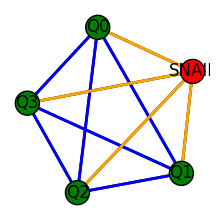

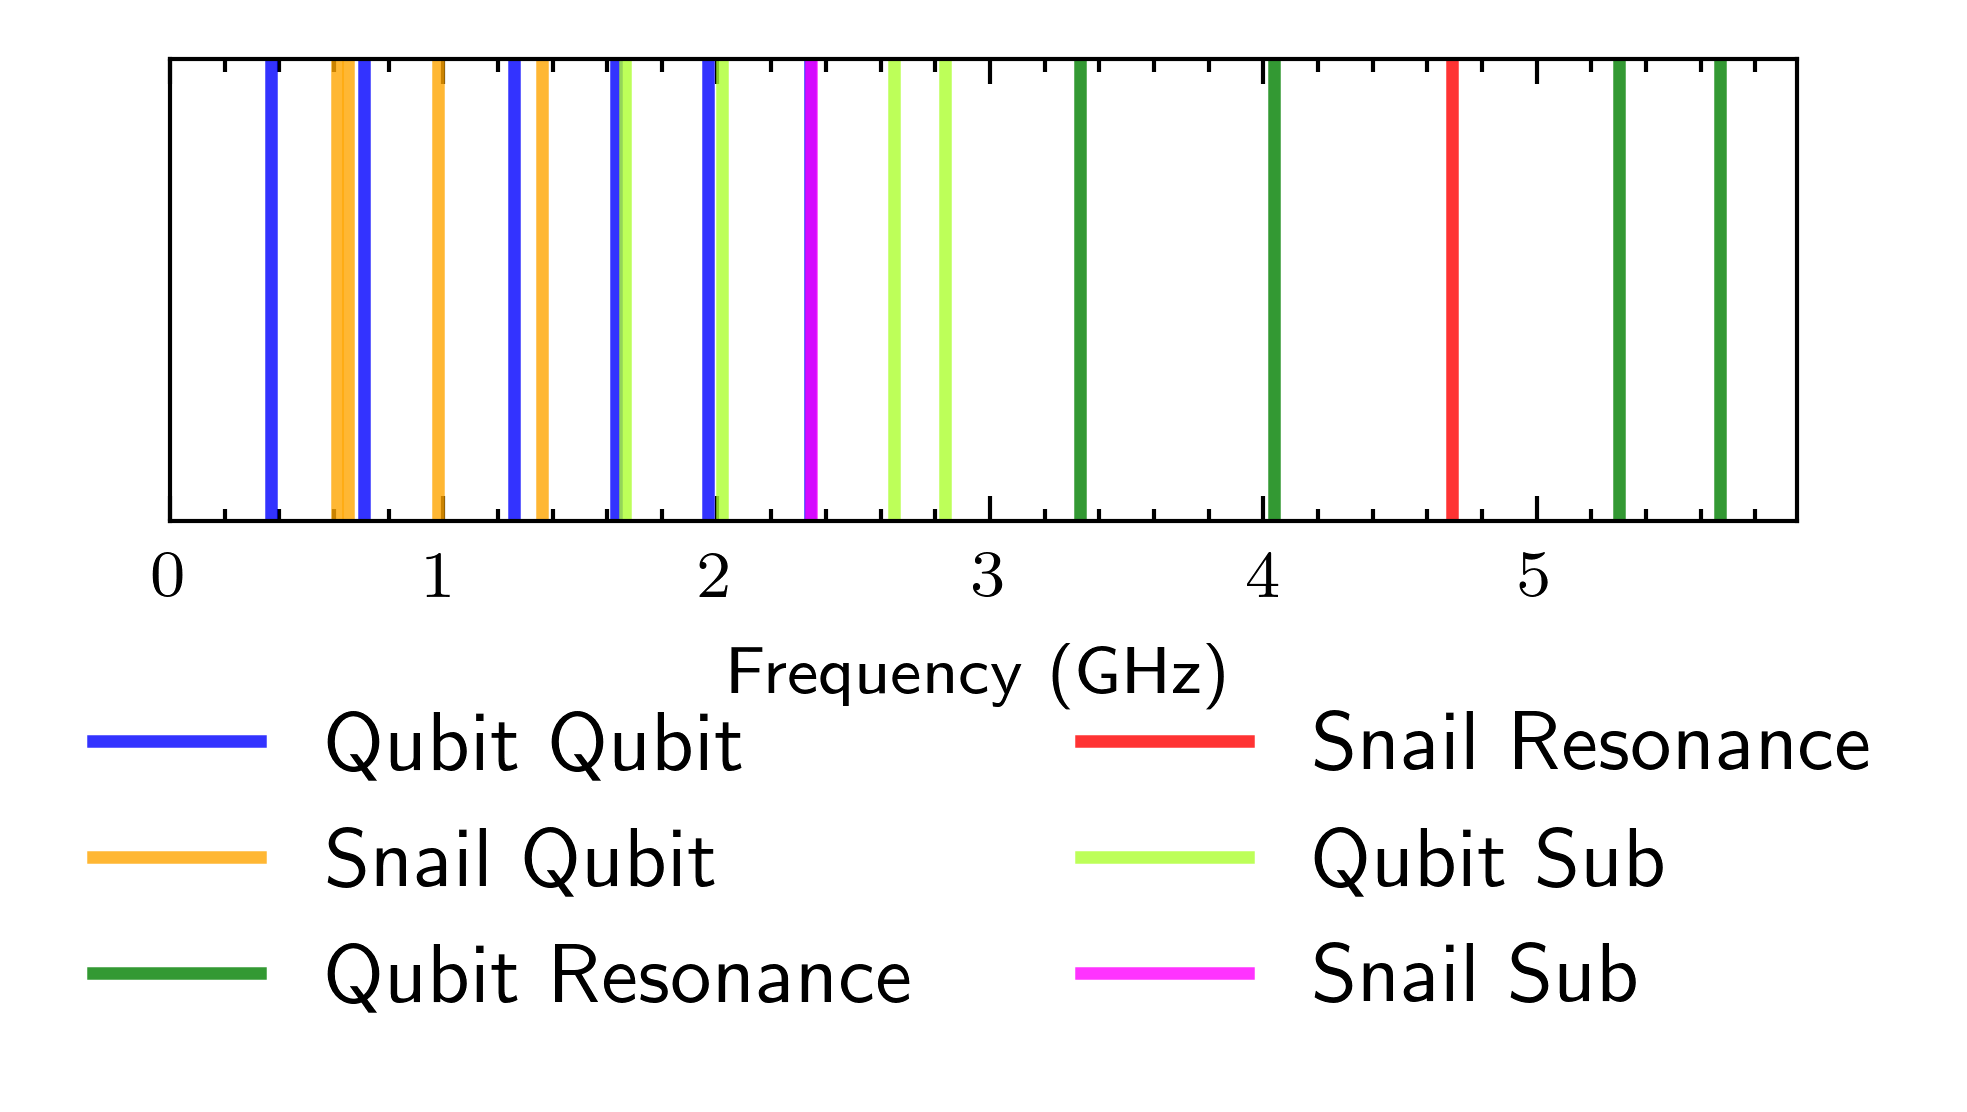

In [9]:
# baseline from Israa+Gaurav initial designs
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
optimizer.best_frequencies = [3.33, 5.67, 4.04, 5.30, 4.69]
# optimizer.best_frequencies = [3.33, 5.70, 5.13640275, 5.3, 4.69]
optimizer.report_results()

100%|██████████| 64/64 [00:19<00:00,  3.26it/s]

Optimization terminated successfully.
Qubit Frequencies: [3.66966045 5.65640327 5.13640275 5.33640297] GHz
SNAIL Frequency: 4.416478841703594 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 1.986743 GHz → Infidelity (no lifetime loss): 2.663275e-02, Infidelity (with lifetime loss): 3.047434e-02
  Gate ('Q0', 'Q2'): 1.466742 GHz → Infidelity (no lifetime loss): 3.502315e-02, Infidelity (with lifetime loss): 3.739829e-02
  Gate ('Q0', 'Q3'): 1.666743 GHz → Infidelity (no lifetime loss): 2.829468e-02, Infidelity (with lifetime loss): 3.109118e-02
  Gate ('Q1', 'Q2'): 0.520001 GHz → Infidelity (no lifetime loss): 6.113329e-02, Infidelity (with lifetime loss): 6.250456e-02
  Gate ('Q1', 'Q3'): 0.320000 GHz → Infidelity (no lifetime loss): 1.912794e-02, Infidelity (with lifetime loss): 2.044724e-02
  Gate ('Q2', 'Q3'): 0.200000 GHz → Infidelity (no lifetime loss): 1.226754e-02, Infidelity (with lifetime loss): 1.353587e-02

Average Gate Infidelity (no lifetime loss): 2.689655e-02
Average Gate In

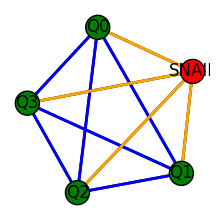

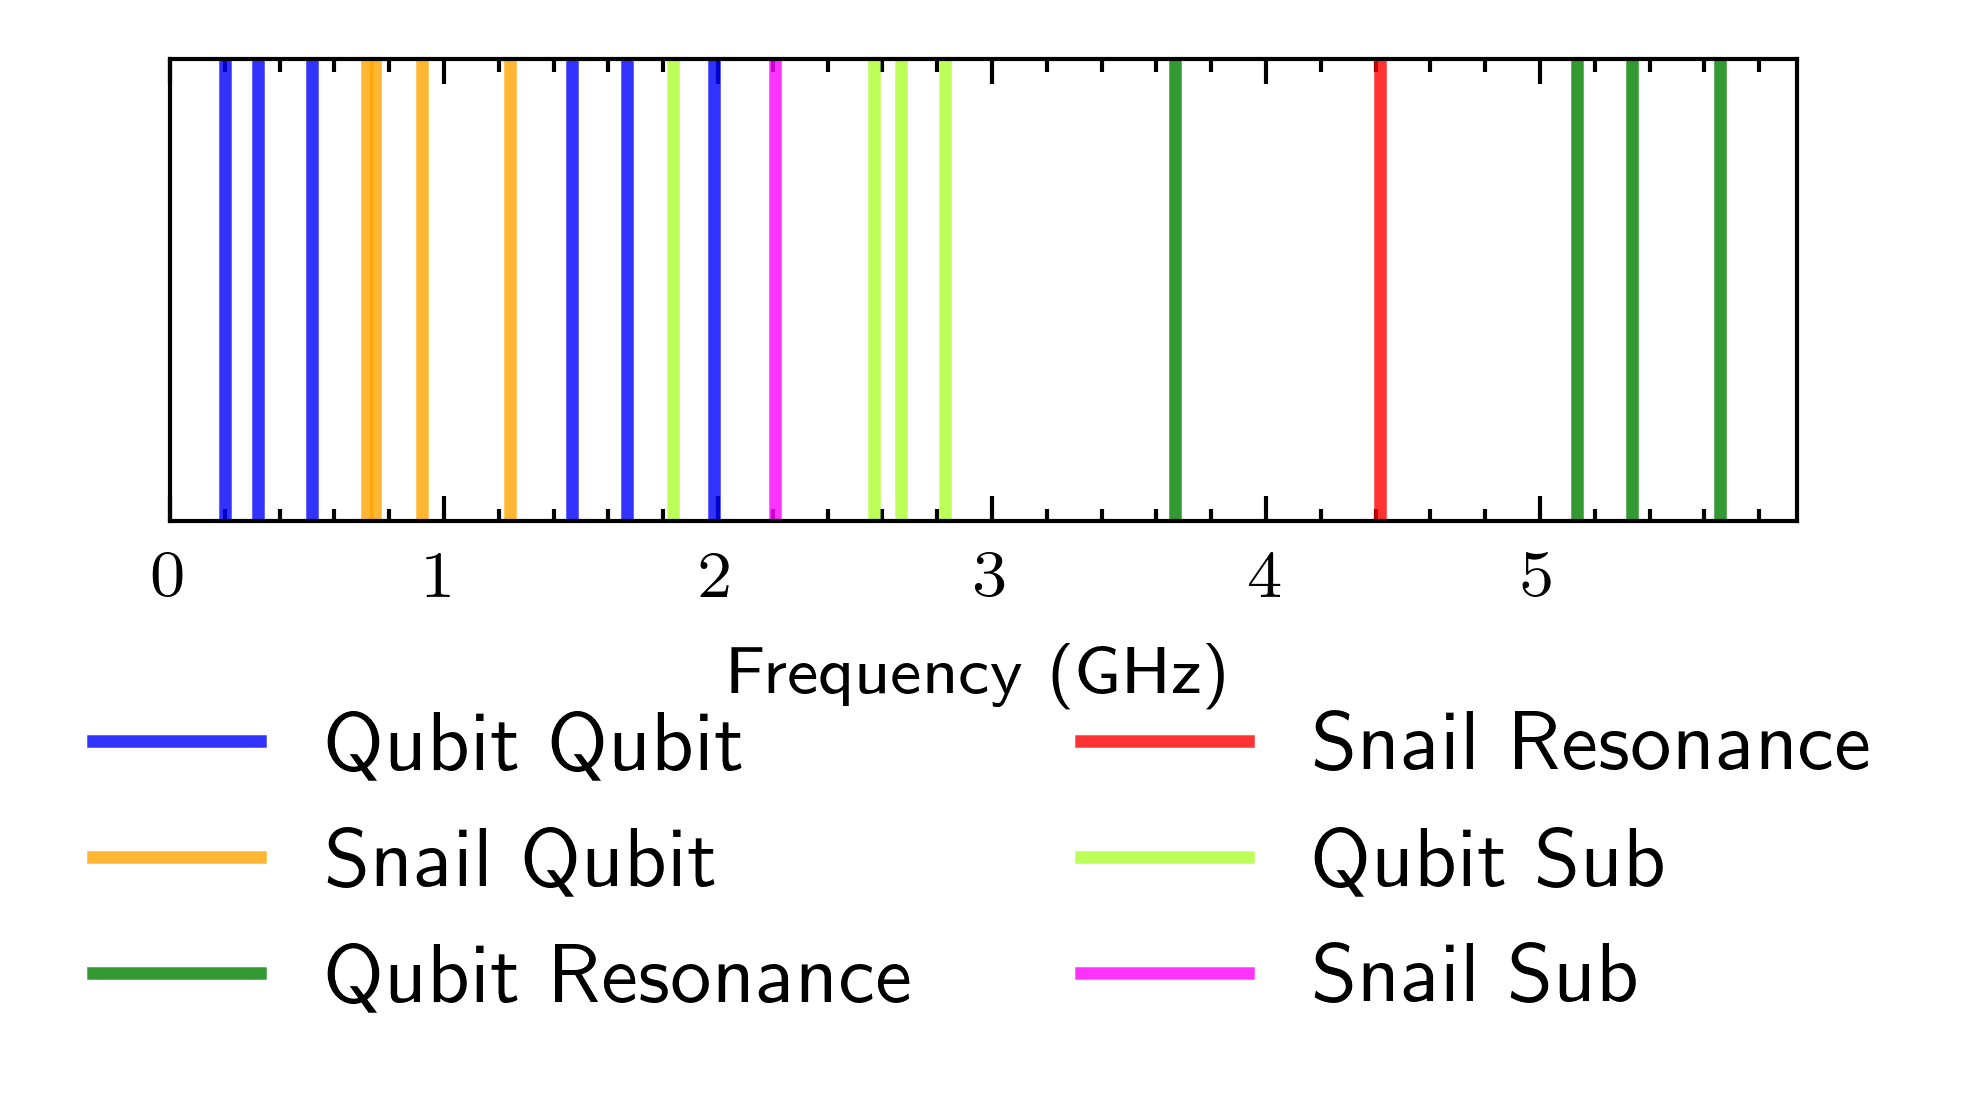

In [29]:
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

Remaining standard module sizes:

100%|██████████| 64/64 [00:01<00:00, 57.87it/s]

Optimization terminated successfully.
Lifetime loss not considered.
Qubit Frequencies: [5.7        5.49999019] GHz
SNAIL Frequency: 4.200000000000036 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 0.200010 GHz → Infidelity (no lifetime loss): 1.175746e-03, Infidelity (with lifetime loss): 1.175746e-03

Average Gate Infidelity (no lifetime loss): 1.175746e-03
Average Gate Infidelity (with lifetime loss): 1.175746e-03


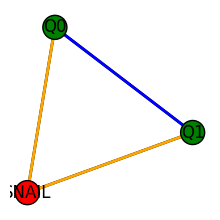

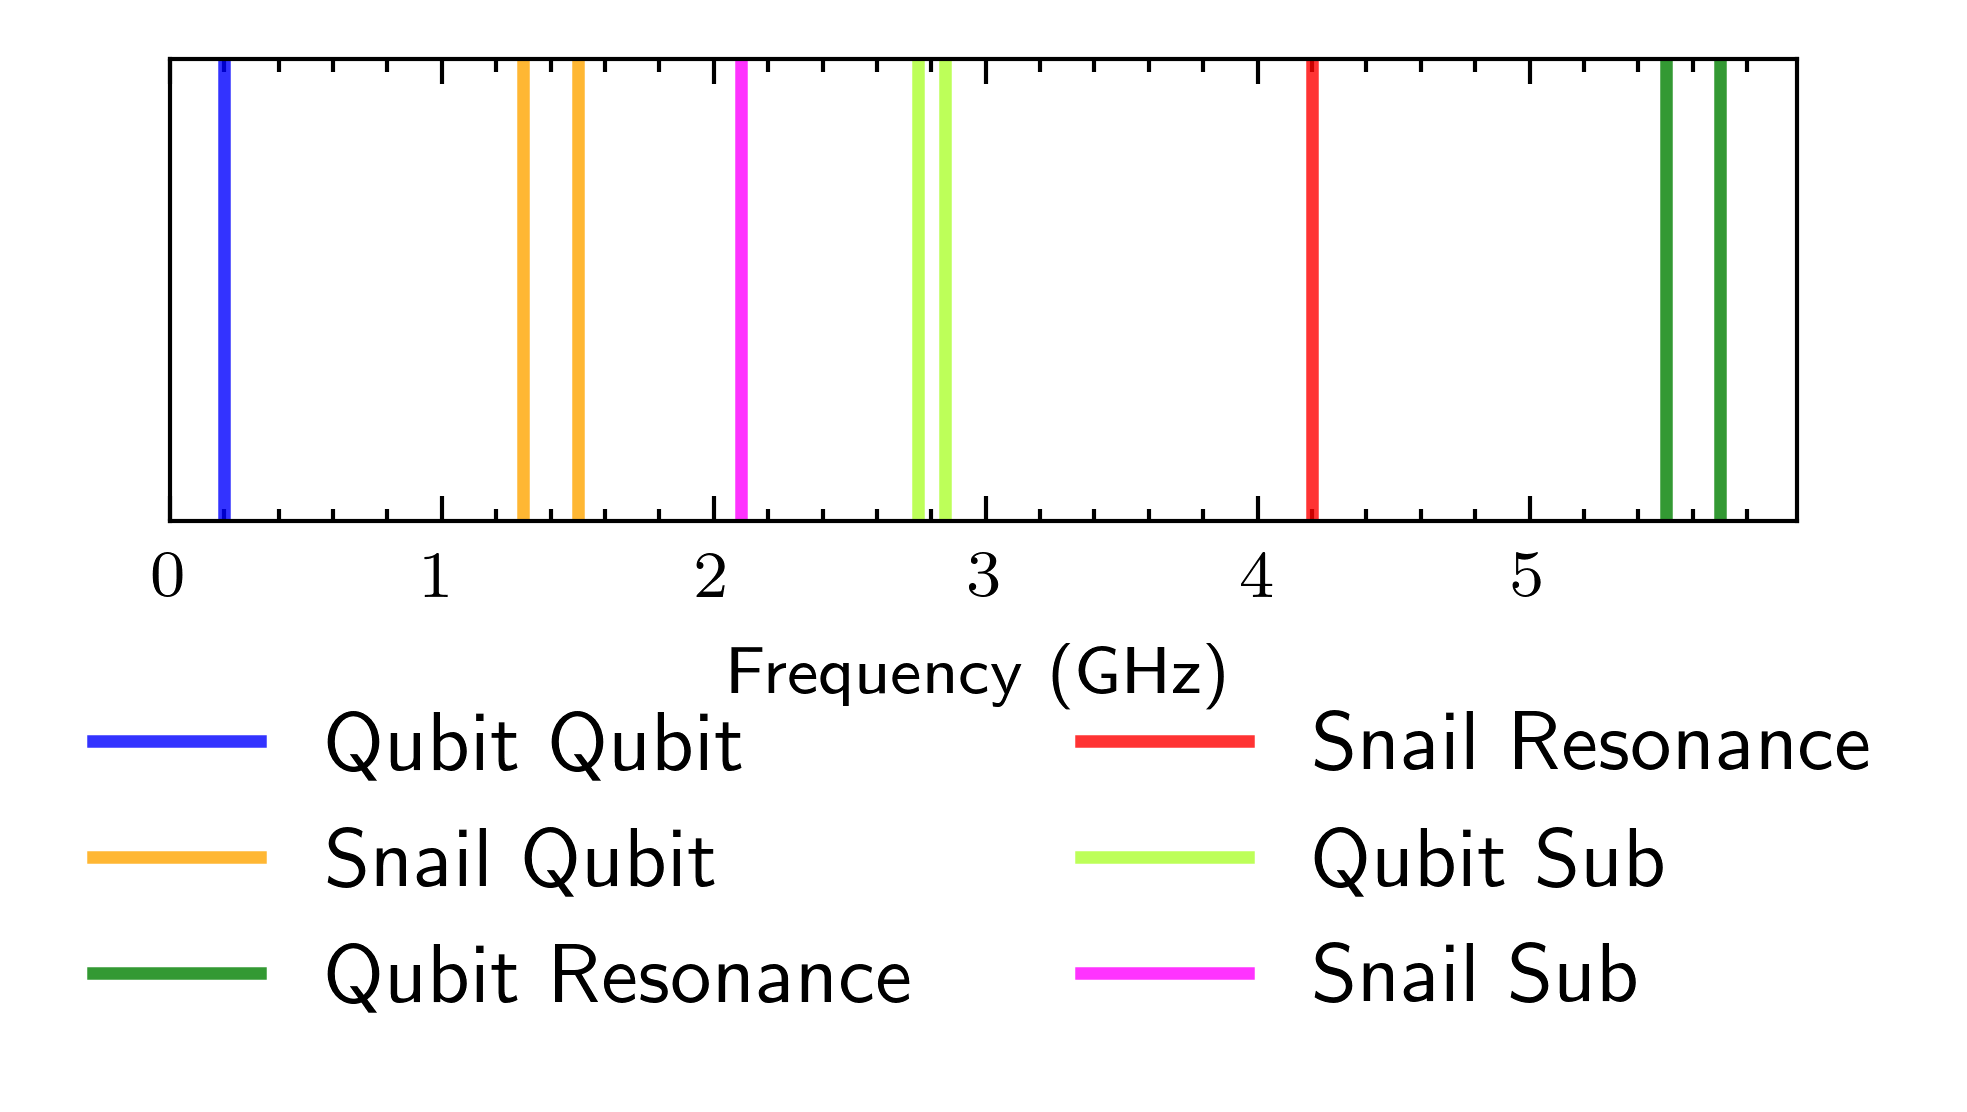

In [30]:
module = QuantumModuleGraph(num_qubits=2)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

100%|██████████| 64/64 [00:06<00:00,  9.40it/s]

Optimization terminated successfully.
Lifetime loss not considered.
Qubit Frequencies: [3.50000286 5.69999987 3.30000285] GHz
SNAIL Frequency: 4.5421894719079585 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 2.199997 GHz → Infidelity (no lifetime loss): 4.285498e-03, Infidelity (with lifetime loss): 4.285498e-03
  Gate ('Q0', 'Q2'): 0.200000 GHz → Infidelity (no lifetime loss): 2.893933e-03, Infidelity (with lifetime loss): 2.893933e-03
  Gate ('Q1', 'Q2'): 2.399997 GHz → Infidelity (no lifetime loss): 3.340097e-03, Infidelity (with lifetime loss): 3.340097e-03

Average Gate Infidelity (no lifetime loss): 3.460055e-03
Average Gate Infidelity (with lifetime loss): 3.460055e-03


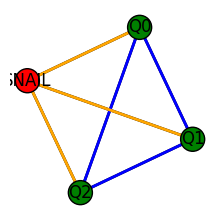

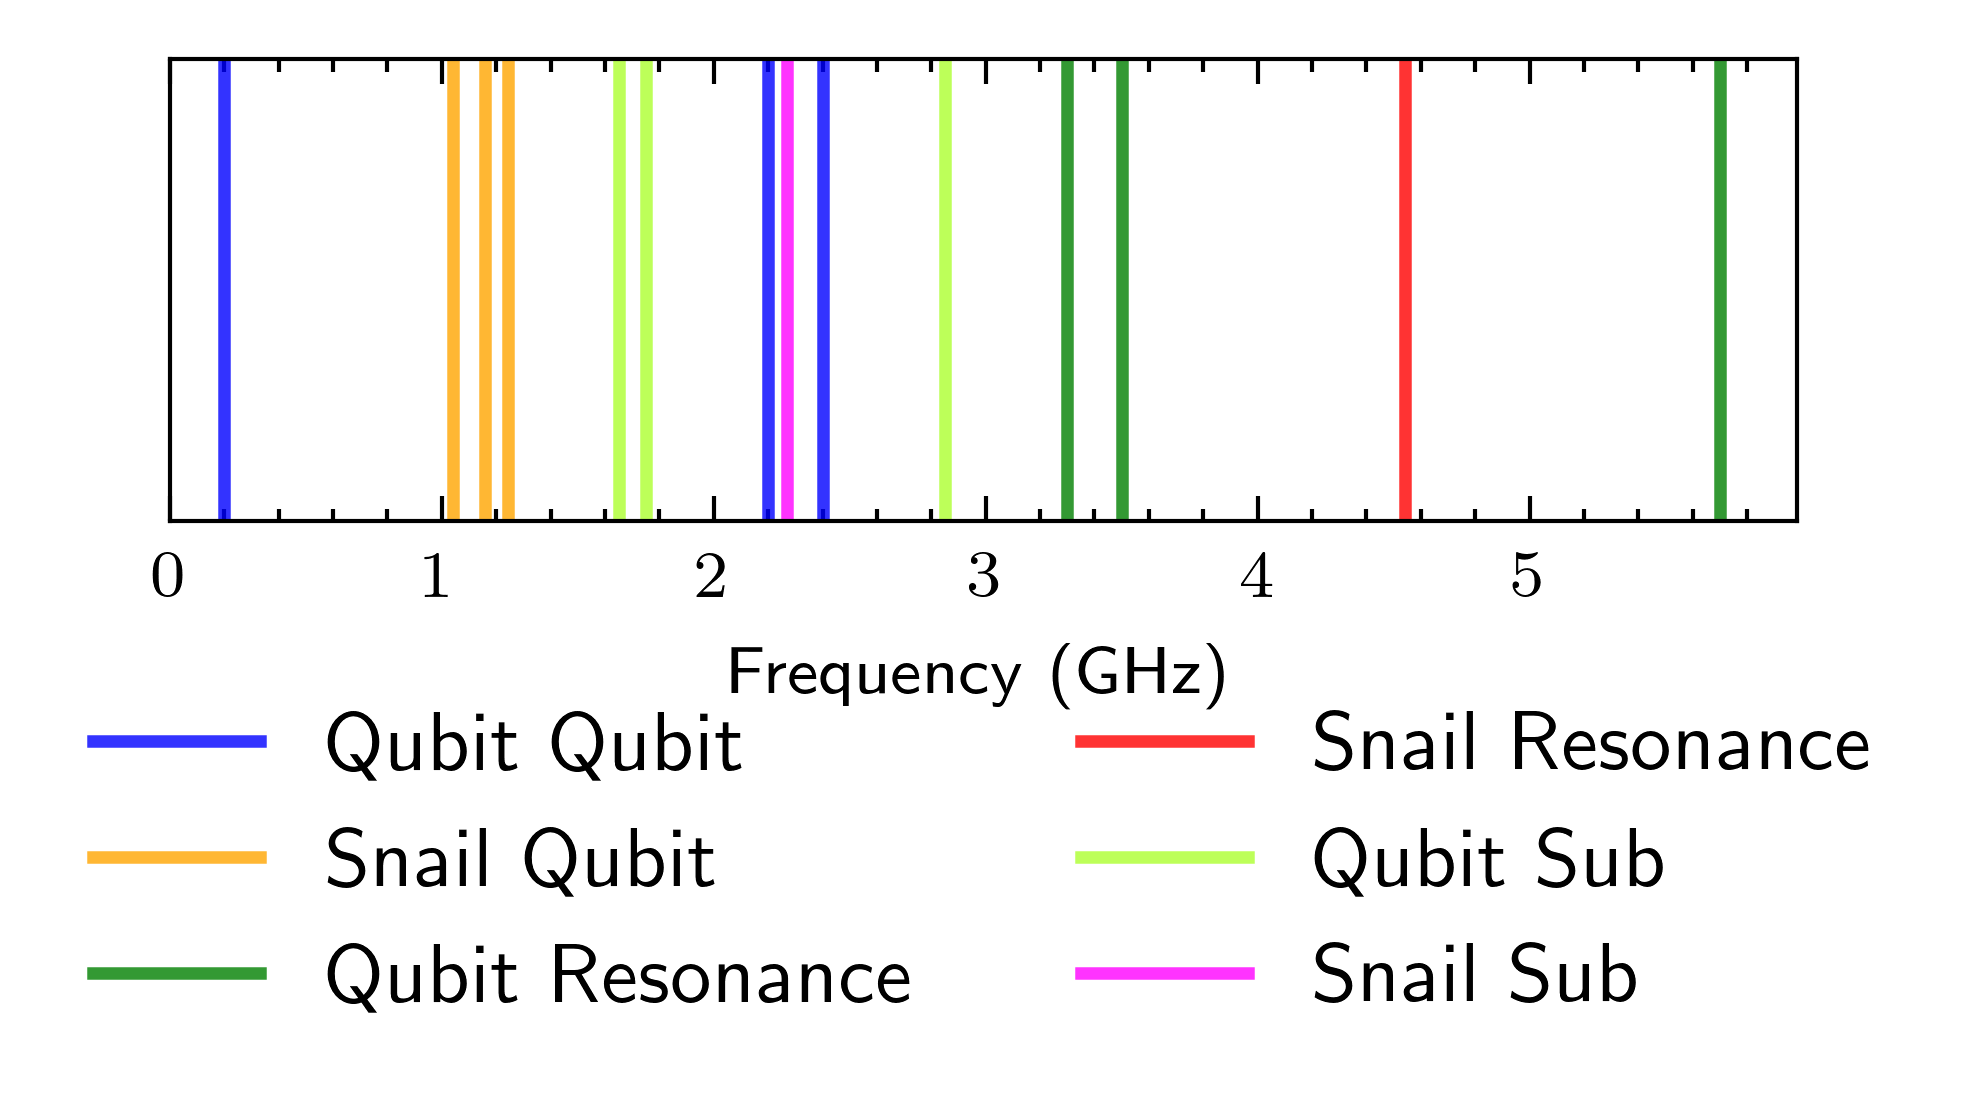

In [31]:
module = QuantumModuleGraph(num_qubits=3)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

In [ ]:
module = QuantumModuleGraph(num_qubits=5)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

 56%|█████▋    | 36/64 [00:26<00:18,  1.54it/s]